Name: John Edward Binay

Activity: Prelim Skills Exam

Date Submitted: 2022-03-31

Instructor: Engr. Villanueva, Alonica

# Objectives

Use the given dataset in this link.

https://drive.google.com/drive/folders/1N5cVU1jH-Yjvt3eLDDWShEp0O0_UUeic?usp=sharing


1. Build and train a CNN model from a scratch.  Apply different regularization techniques and data preprocessing to reduce overfitting.

2.  Plot the training and validation loss and accuracy. The target accuracy is 85 and above.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the files
!unzip "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/Covid_19.zip" -d "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2" 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import os

* There are 3,616 COVID images/masks
* There are 6,012 Lung Opacity images/makss
* There are 10,192 Normal images/masks
* There are 1,345 Viral Pneumonia images/masks

In [ ]:
Target_dir = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/Covid_19.zip" -d "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/"

In [6]:
# We can extract 1,345 images of viral pneumonia, normal, and covid to keep our dataset balanced and 
# not imbalanced

import random
vp_imgs = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
normal_imgs = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/Normal/images"
cov_imgs = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/COVID/images"

Create folders called 'train' and 'test' located in '/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset' then create subfolders for each called 'normal', 'covid', and 'viral_pneumonia'

The training folder will contain 941 randomized images for each respective subfolder types (i.e. 941 images for covid, normal, and viral_pneumonia)

The test folder will contain 404 randomized images for each respective subfolder types (i.e. 404 images for covid, normal, and viral_pneumonia)

In [14]:
import shutil

cov_names = os.listdir(cov_imgs)
normal_names = os.listdir(normal_imgs)
vp_names = os.listdir(vp_imgs)

In [16]:
random.shuffle(cov_names)
random.shuffle(vp_names)
random.shuffle(normal_names)
for i in range(941):
  cov_img = cov_names[i]
  normal_img = normal_names[i]
  vp_img = vp_names[i]
  cov_path = os.path.join(cov_imgs, cov_img)
  cov_train_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/train/covid", cov_img)
  normal_path = os.path.join(normal_imgs, normal_img)
  normal_train_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/train/normal", normal_img)
  vp_path = os.path.join(vp_imgs, vp_img)
  vp_train_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/train/viral_pneumonia", vp_img) 
  shutil.move(cov_path, cov_train_path)
  print("moving cov image ", i)
  shutil.move(normal_path, normal_train_path)
  print("moving normal image ", i)
  shutil.move(vp_path, vp_train_path)
  print("moving viral pneumonia image ", i)

moving cov image  0
moving normal image  0
moving viral pneumonia image  0
moving cov image  1
moving normal image  1
moving viral pneumonia image  1
moving cov image  2
moving normal image  2
moving viral pneumonia image  2
moving cov image  3
moving normal image  3
moving viral pneumonia image  3
moving cov image  4
moving normal image  4
moving viral pneumonia image  4
moving cov image  5
moving normal image  5
moving viral pneumonia image  5
moving cov image  6
moving normal image  6
moving viral pneumonia image  6
moving cov image  7
moving normal image  7
moving viral pneumonia image  7
moving cov image  8
moving normal image  8
moving viral pneumonia image  8
moving cov image  9
moving normal image  9
moving viral pneumonia image  9
moving cov image  10
moving normal image  10
moving viral pneumonia image  10
moving cov image  11
moving normal image  11
moving viral pneumonia image  11
moving cov image  12
moving normal image  12
moving viral pneumonia image  12
moving cov image

In [19]:
cov_names = os.listdir(cov_imgs)
normal_names = os.listdir(normal_imgs)
vp_names = os.listdir(vp_imgs)

In [20]:
random.shuffle(cov_names)
random.shuffle(vp_names)
random.shuffle(normal_names)
for i in range(404):
  cov_img = cov_names[i]
  normal_img = normal_names[i]
  vp_img = vp_names[i]
  cov_path = os.path.join(cov_imgs, cov_img)
  cov_test_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/test/covid", cov_img)
  normal_path = os.path.join(normal_imgs, normal_img)
  normal_test_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/test/normal", normal_img)
  vp_path = os.path.join(vp_imgs, vp_img)
  vp_test_path = os.path.join("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/test/viral_pneumonia", vp_img)
  shutil.move(cov_path, cov_test_path)
  print("moving cov image ", i)
  shutil.move(normal_path, normal_test_path)
  print("moving normal image ", i)
  shutil.move(vp_path, vp_test_path)
  print("moving viral pneumonia image ", i)

moving cov image  0
moving normal image  0
moving viral pneumonia image  0
moving cov image  1
moving normal image  1
moving viral pneumonia image  1
moving cov image  2
moving normal image  2
moving viral pneumonia image  2
moving cov image  3
moving normal image  3
moving viral pneumonia image  3
moving cov image  4
moving normal image  4
moving viral pneumonia image  4
moving cov image  5
moving normal image  5
moving viral pneumonia image  5
moving cov image  6
moving normal image  6
moving viral pneumonia image  6
moving cov image  7
moving normal image  7
moving viral pneumonia image  7
moving cov image  8
moving normal image  8
moving viral pneumonia image  8
moving cov image  9
moving normal image  9
moving viral pneumonia image  9
moving cov image  10
moving normal image  10
moving viral pneumonia image  10
moving cov image  11
moving normal image  11
moving viral pneumonia image  11
moving cov image  12
moving normal image  12
moving viral pneumonia image  12
moving cov image

In [21]:
train_path = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/train"
test_path = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/test"

## Model 1

In [96]:
# Build the Sequential CNN model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation = "relu", input_shape = (224,224,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(3, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer="adam",
              metrics = ["accuracy"])

In [97]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                

In [98]:
# Augmentation on the training datasets
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [99]:
train_generator= train_datagen.flow_from_directory(
   "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Data Science 3/data/prelim_data_2/COVID-19_Radiography_Dataset/train",
   target_size = (224,224),
   batch_size = 32,
   class_mode = "categorical"
)

Found 2823 images belonging to 3 classes.


In [100]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral_pneumonia': 2}

In [101]:
test_generator= test_datagen.flow_from_directory(
   test_path,
   target_size = (224,224),
   batch_size = 32,
   class_mode = "categorical"
)

Found 1212 images belonging to 3 classes.


In [102]:
test_generator.class_indices

{'covid': 0, 'normal': 1, 'viral_pneumonia': 2}

In [103]:
# batch_size = 128
epochs = 10
hist = model.fit(
    train_generator,
    # steps_per_epoch = 8,
    epochs=epochs,
    validation_data=test_generator)

Epoch 1/10
89/89 [==============================] - 61s 675ms/step - loss: 0.9174 - accuracy: 0.5459 - val_loss: 0.6922 - val_accuracy: 0.6873
Epoch 2/10
89/89 [==============================] - 61s 678ms/step - loss: 0.7444 - accuracy: 0.6436 - val_loss: 0.6823 - val_accuracy: 0.7607
Epoch 3/10
89/89 [==============================] - 62s 693ms/step - loss: 0.7182 - accuracy: 0.6401 - val_loss: 0.5593 - val_accuracy: 0.7384
Epoch 4/10
89/89 [==============================] - 61s 682ms/step - loss: 0.6982 - accuracy: 0.6642 - val_loss: 0.5881 - val_accuracy: 0.7715
Epoch 5/10
89/89 [==============================] - 59s 664ms/step - loss: 0.6361 - accuracy: 0.6957 - val_loss: 0.5497 - val_accuracy: 0.7814
Epoch 6/10
89/89 [==============================] - 60s 672ms/step - loss: 0.6658 - accuracy: 0.6773 - val_loss: 0.5557 - val_accuracy: 0.7822
Epoch 7/10
89/89 [==============================] - 60s 672ms/step - loss: 0.6246 - accuracy: 0.7074 - val_loss: 0.5183 - val_accuracy: 0.7756

In [108]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

Test loss: 0.5329847931861877
Test accuracy: 0.7698019742965698
Train loss: 0.5925237536430359
Train accuracy: 0.7201558351516724


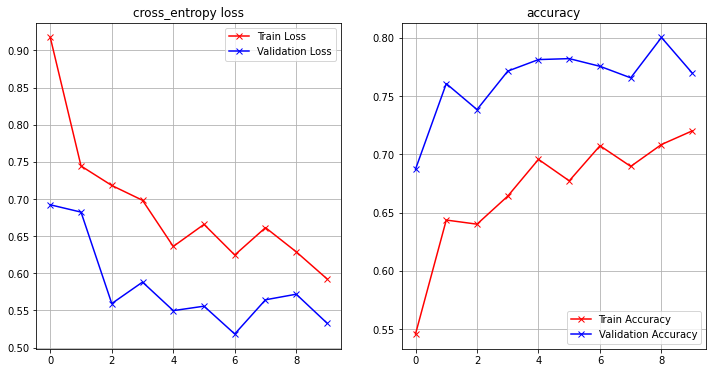

In [112]:
print('Test loss:', hist.history["val_loss"][-1])
print('Test accuracy:', hist.history["val_accuracy"][-1])
print('Train loss:', hist.history["loss"][-1])
print('Train accuracy:', hist.history["accuracy"][-1])
plot_loss_accuracy(hist)

## Model 2

In [104]:
from keras import regularizers

model_2 = Sequential()
model_2.add(Conv2D(128, kernel_size =3, activation = "relu", input_shape = (224,224,3), kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size =2, strides = 2))
model_2.add(Conv2D(32, (3,3), activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size =2, strides = 2))
model_2.add(Conv2D(64, (3,3), activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size =(2,2)))
model_2.add(Flatten())
model_2.add(Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(Dense(3, activation = "softmax"))

model_2.compile(loss = "categorical_crossentropy",
              optimizer="adam",
              metrics = ["accuracy"])

In [105]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 109, 109, 32)      36896     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 26, 26, 64)     

In [106]:
epochs = 10
hist_2 = model_2.fit(
    train_generator,
    # steps_per_epoch = 8,
    epochs=epochs,
    validation_data=test_generator)

Epoch 1/10
89/89 [==============================] - 61s 653ms/step - loss: 0.7737 - accuracy: 0.6429 - val_loss: 0.6367 - val_accuracy: 0.7170
Epoch 2/10
89/89 [==============================] - 57s 643ms/step - loss: 0.6248 - accuracy: 0.7230 - val_loss: 0.5852 - val_accuracy: 0.7211
Epoch 3/10
89/89 [==============================] - 61s 680ms/step - loss: 0.5566 - accuracy: 0.7591 - val_loss: 0.6243 - val_accuracy: 0.7393
Epoch 4/10
89/89 [==============================] - 59s 664ms/step - loss: 0.5519 - accuracy: 0.7651 - val_loss: 0.4919 - val_accuracy: 0.7781
Epoch 5/10
89/89 [==============================] - 58s 649ms/step - loss: 0.5360 - accuracy: 0.7751 - val_loss: 0.4561 - val_accuracy: 0.8086
Epoch 6/10
89/89 [==============================] - 58s 651ms/step - loss: 0.4899 - accuracy: 0.7963 - val_loss: 0.4269 - val_accuracy: 0.8358
Epoch 7/10
89/89 [==============================] - 58s 649ms/step - loss: 0.4798 - accuracy: 0.7995 - val_loss: 0.4753 - val_accuracy: 0.8069

Test loss: 0.3714073598384857
Test accuracy: 0.8671616911888123
Train loss: 0.42508265376091003
Train accuracy: 0.8349273800849915


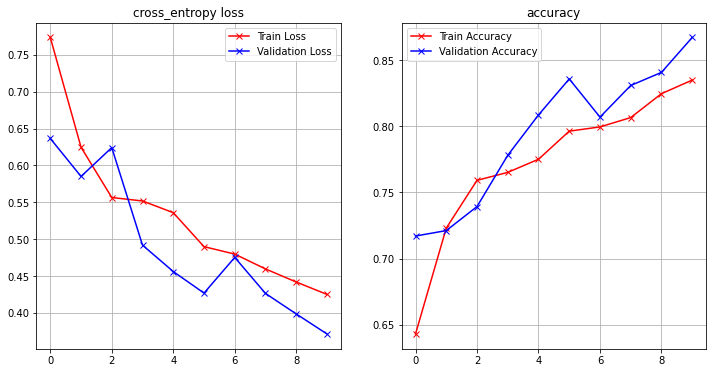

In [111]:
print('Test loss:', hist_2.history["val_loss"][-1])
print('Test accuracy:', hist_2.history["val_accuracy"][-1])
print('Train loss:', hist_2.history["loss"][-1])
print('Train accuracy:', hist_2.history["accuracy"][-1])
plot_loss_accuracy(hist_2)

## Saving Model

In [ ]:
# model_2.save("model_2.h5")
# loading the model

# model = load_model("model_2.h5")
# model.evaluate_generator(train_generator)
# model.evaluate_generator(test_generator) 

## Final Model and Model Analysis

* choose model 2
* combine train and test dataset (called train_final)
* feed remaining images not used to the CNN model and check out results

# Transfer Learning

1.  Use a pre-trained model and fine-tuned it. 

2. Build and train a CNN model using the modified pretrained model.

3. Plot the training and validation loss and accuracy. The target accuracy is 90 and above.

## ResNet50

In [146]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [153]:
t_model = ResNet50(weights = "imagenet", input_shape=(224,224,3), include_top = False)

In [155]:
for layer in t_model.layers:
    layer.trainable = False

In [157]:
model_combine = Sequential()
model_combine.add(t_model)
model_combine.add(Flatten())
model_combine.add(Dense(128, activation = "relu"))
model_combine.add(Dense(64, activation = "relu"))
model_combine.add(Dense(32, activation = "relu"))
model_combine.add(Dense(3, activation = "softmax"))
model_combine.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_26 (Flatten)        (None, 100352)            0         
                                                                 
 dense_58 (Dense)            (None, 128)               12845184  
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 3)                 99        
                                                                 
Total params: 36,443,331
Trainable params: 12,855,619

In [158]:
model_combine.compile(loss = "categorical_crossentropy",
              optimizer=Adam(lr = 0.001),
              metrics = ["accuracy"])

hist_combine = model_combine.fit(
    train_generator,
    # steps_per_epoch = 8,
    epochs=10,
    validation_data=test_generator)


Epoch 1/10
89/89 [==============================] - 65s 686ms/step - loss: 1.2444 - accuracy: 0.4513 - val_loss: 1.1203 - val_accuracy: 0.5256
Epoch 2/10
89/89 [==============================] - 60s 676ms/step - loss: 0.9413 - accuracy: 0.5512 - val_loss: 0.8319 - val_accuracy: 0.6229
Epoch 3/10
89/89 [==============================] - 64s 719ms/step - loss: 0.8383 - accuracy: 0.6079 - val_loss: 0.7009 - val_accuracy: 0.7038
Epoch 4/10
89/89 [==============================] - 60s 672ms/step - loss: 0.7571 - accuracy: 0.6429 - val_loss: 0.6511 - val_accuracy: 0.6667
Epoch 5/10
89/89 [==============================] - 59s 660ms/step - loss: 0.7337 - accuracy: 0.6670 - val_loss: 0.6566 - val_accuracy: 0.7203
Epoch 6/10
89/89 [==============================] - 62s 701ms/step - loss: 0.7145 - accuracy: 0.6723 - val_loss: 0.7987 - val_accuracy: 0.5627
Epoch 7/10
89/89 [==============================] - 62s 691ms/step - loss: 0.7131 - accuracy: 0.6677 - val_loss: 0.6072 - val_accuracy: 0.7228

Test loss: 0.5785264372825623
Test accuracy: 0.7194719314575195
Train loss: 0.7184997797012329
Train accuracy: 0.6627700924873352


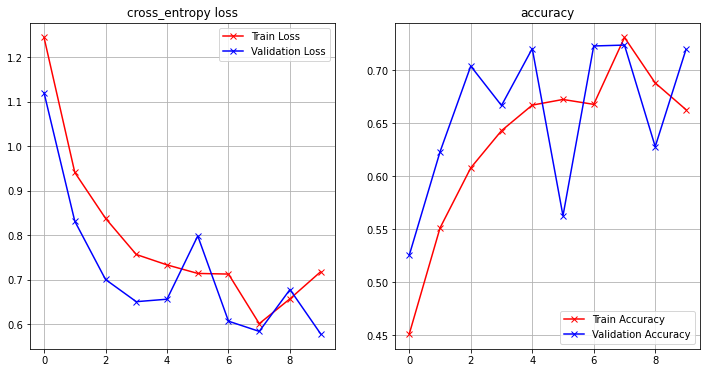

In [174]:
print('Test loss:', hist_combine.history["val_loss"][-1])
print('Test accuracy:', hist_combine.history["val_accuracy"][-1])
print('Train loss:', hist_combine.history["loss"][-1])
print('Train accuracy:', hist_combine.history["accuracy"][-1])
plot_loss_accuracy(hist_combine)

## ResNet50 version_2

In [159]:
model_combine_2 = Sequential()
model_combine_2.add(t_model)
model_combine_2.add(MaxPooling2D(pool_size =(2,2)))
model_combine_2.add(Flatten())
model_combine_2.add(Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_combine_2.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_combine_2.add(Dense(3, activation = "softmax"))

In [161]:
model_combine_2.compile(loss = "categorical_crossentropy",
              optimizer="adam",
              metrics = ["accuracy"])

hist_combine_2 = model_combine_2.fit(
    train_generator,
    # steps_per_epoch = 8,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
89/89 [==============================] - 82s 814ms/step - loss: 1.1665 - accuracy: 0.3925 - val_loss: 0.9164 - val_accuracy: 0.6617
Epoch 2/10
89/89 [==============================] - 67s 747ms/step - loss: 0.9750 - accuracy: 0.5225 - val_loss: 0.8668 - val_accuracy: 0.5875
Epoch 3/10
89/89 [==============================] - 63s 712ms/step - loss: 0.8416 - accuracy: 0.6128 - val_loss: 0.7452 - val_accuracy: 0.6939
Epoch 4/10
89/89 [==============================] - 61s 683ms/step - loss: 0.7736 - accuracy: 0.6560 - val_loss: 0.7331 - val_accuracy: 0.6485
Epoch 5/10
89/89 [==============================] - 61s 690ms/step - loss: 0.7291 - accuracy: 0.6713 - val_loss: 0.7121 - val_accuracy: 0.6865
Epoch 6/10
89/89 [==============================] - 64s 722ms/step - loss: 0.7294 - accuracy: 0.6688 - val_loss: 0.6685 - val_accuracy: 0.6840
Epoch 7/10
89/89 [==============================] - 61s 686ms/step - loss: 0.6843 - accuracy: 0.6922 - val_loss: 0.6484 - val_accuracy: 0.7145

Test loss: 0.6851625442504883
Test accuracy: 0.7095709443092346
Train loss: 0.6683652997016907
Train accuracy: 0.6971307396888733


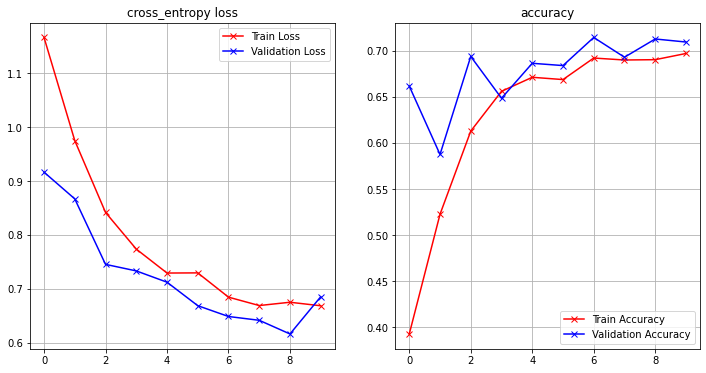

In [175]:
print('Test loss:', hist_combine_2.history["val_loss"][-1])
print('Test accuracy:', hist_combine_2.history["val_accuracy"][-1])
print('Train loss:', hist_combine_2.history["loss"][-1])
print('Train accuracy:', hist_combine_2.history["accuracy"][-1])
plot_loss_accuracy(hist_combine_2)

## ResNet without weights

In [163]:
t_model_3 = ResNet50(weights=None, input_shape=(224,224,3), include_top=False)
t_model_3.trainable = False

In [164]:
model_combine_3 = Sequential()
model_combine_3.add(t_model_3)
model_combine_3.add(MaxPooling2D(pool_size =(2,2)))
model_combine_3.add(Flatten())
model_combine_3.add(Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
model_combine_3.add(Dense(3, activation = "softmax"))

model_combine_3.compile(loss = "categorical_crossentropy",
              optimizer=Adam(lr = 0.001),
              metrics = ["accuracy"])

hist_combine_3 = model_combine_3.fit(
    train_generator,
    # steps_per_epoch = 8,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
89/89 [==============================] - 67s 705ms/step - loss: 0.9549 - accuracy: 0.5657 - val_loss: 0.7872 - val_accuracy: 0.6955
Epoch 2/10
89/89 [==============================] - 62s 697ms/step - loss: 0.7452 - accuracy: 0.6897 - val_loss: 0.6612 - val_accuracy: 0.7434
Epoch 3/10
89/89 [==============================] - 66s 740ms/step - loss: 0.6951 - accuracy: 0.7099 - val_loss: 0.6410 - val_accuracy: 0.7153
Epoch 4/10
89/89 [==============================] - 62s 692ms/step - loss: 0.6790 - accuracy: 0.7074 - val_loss: 0.6424 - val_accuracy: 0.7129
Epoch 5/10
89/89 [==============================] - 61s 689ms/step - loss: 0.6398 - accuracy: 0.7205 - val_loss: 0.5929 - val_accuracy: 0.7368
Epoch 6/10
89/89 [==============================] - 61s 689ms/step - loss: 0.6246 - accuracy: 0.7294 - val_loss: 0.6239 - val_accuracy: 0.7475
Epoch 7/10
89/89 [==============================] - 61s 685ms/step - loss: 0.6179 - accuracy: 0.7329 - val_loss: 0.5660 - val_accuracy: 0.7492

Test loss: 0.5426440238952637
Test accuracy: 0.7648515105247498
Train loss: 0.5997710824012756
Train accuracy: 0.7364506125450134


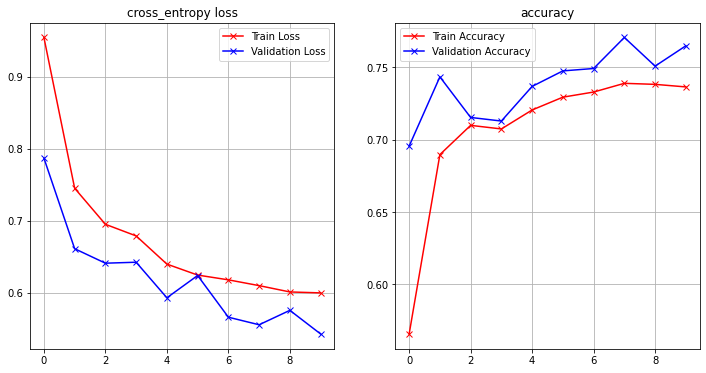

In [176]:
print('Test loss:', hist_combine_3.history["val_loss"][-1])
print('Test accuracy:', hist_combine_3.history["val_accuracy"][-1])
print('Train loss:', hist_combine_3.history["loss"][-1])
print('Train accuracy:', hist_combine_3.history["accuracy"][-1])
plot_loss_accuracy(hist_combine_3)

## VGG16 version 1

* Extending our model on top of VGG16
* no fine tuning
* pre-trained weights are frozen

In [165]:
from tensorflow.keras.applications import VGG16

t_model_4 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

t_model_4.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [166]:
# freeze all trainable parameters, so weights of the pre-trained model won't get updated and lose
# the weights it acquired when it was learning from images before. Essentially we will see what the 
# pretrained CNN will give us given all the images it's learned from.

t_model_4.trainable = False

In [172]:
model_vgg16_1 = Sequential()
model_vgg16_1.add(t_model_4)
model_vgg16_1.add(Flatten())

# add your custom dense layers. VGG16 has no dense layer on purpose, so us users can use it for multiclass or
# binary classification purposes. 

model_vgg16_1.add(Dense(256, activation='relu'))
model_vgg16_1.add(Dense(128, activation='relu'))
model_vgg16_1.add(Dense(3, activation='softmax'))

In [173]:
model_vgg16_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=2e-5),
              metrics=['acc'])

hist_vgg16_1 = model_vgg16_1.fit_generator(
      train_generator,
      epochs=15,
      validation_data=test_generator,
      verbose=2)

Epoch 1/15
89/89 - 65s - loss: 0.6437 - acc: 0.7630 - val_loss: 0.4673 - val_acc: 0.8441 - 65s/epoch - 735ms/step
Epoch 2/15
89/89 - 64s - loss: 0.4366 - acc: 0.8367 - val_loss: 0.3590 - val_acc: 0.8672 - 64s/epoch - 719ms/step
Epoch 3/15
89/89 - 66s - loss: 0.3588 - acc: 0.8608 - val_loss: 0.3265 - val_acc: 0.8771 - 66s/epoch - 746ms/step
Epoch 4/15
89/89 - 65s - loss: 0.3127 - acc: 0.8824 - val_loss: 0.2821 - val_acc: 0.8903 - 65s/epoch - 727ms/step
Epoch 5/15
89/89 - 65s - loss: 0.2856 - acc: 0.8866 - val_loss: 0.2838 - val_acc: 0.8936 - 65s/epoch - 726ms/step
Epoch 6/15
89/89 - 65s - loss: 0.2585 - acc: 0.8983 - val_loss: 0.2804 - val_acc: 0.8919 - 65s/epoch - 729ms/step
Epoch 7/15
89/89 - 65s - loss: 0.2428 - acc: 0.9079 - val_loss: 0.2273 - val_acc: 0.9200 - 65s/epoch - 733ms/step
Epoch 8/15
89/89 - 75s - loss: 0.2339 - acc: 0.9168 - val_loss: 0.2391 - val_acc: 0.9076 - 75s/epoch - 837ms/step
Epoch 9/15
89/89 - 65s - loss: 0.2267 - acc: 0.9185 - val_loss: 0.2140 - val_acc: 0.9241

In [183]:
hist_vgg16_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Test loss: 0.21388743817806244
Test accuracy: 0.919966995716095
Train loss: 0.1789405345916748
Train accuracy: 0.9341126680374146


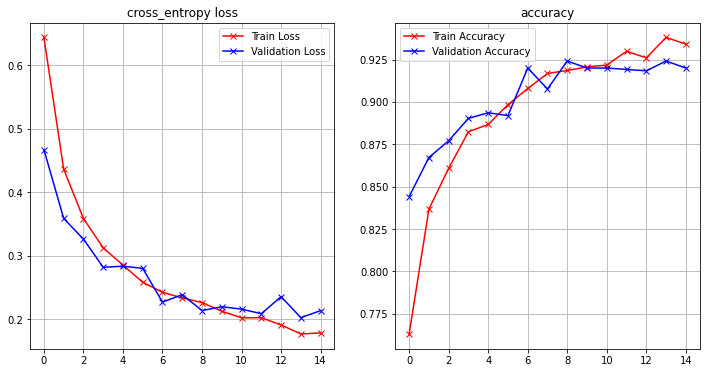

In [185]:
def plot_loss_accuracy_vgg16(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

print('Test loss:', hist_vgg16_1.history["val_loss"][-1])
print('Test accuracy:', hist_vgg16_1.history['val_acc'][-1])
print('Train loss:', hist_vgg16_1.history["loss"][-1])
print('Train accuracy:', hist_vgg16_1.history['acc'][-1])
plot_loss_accuracy_vgg16(hist_vgg16_1)

## VGG16 version 2

* Using Feature Extraction

In [225]:
from tensorflow.keras.applications import VGG16

t_model_5 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

t_model_5.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [226]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = t_model_5.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels


train_features, train_labels = extract_features(train_path, 2823)
test_features, test_labels = extract_features(test_path, 1212)

Found 2823 images belonging to 3 classes.
Found 1212 images belonging to 3 classes.


In [227]:
train_features = np.reshape(train_features, (2823, 7 * 7 * 512))
test_features = np.reshape(test_features, (1212, 7 * 7 * 512))

In [228]:
model_vgg16_2 = Sequential()
model_vgg16_2.add(Dense(256, activation='relu', input_dim=7 * 7 * 512))
model_vgg16_2.add(Dropout(0.4))
model_vgg16_2.add(Dense(256, activation='relu'))
model_vgg16_2.add(Dropout(0.4))
model_vgg16_2.add(Dense(3, activation='softmax'))

model_vgg16_2.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

hist_vgg16_2 = model_vgg16_2.fit(train_features, train_labels,
                    epochs=40,
                    batch_size=20,
                    validation_data=(test_features, test_labels))

Epoch 1/40
142/142 [==============================] - 2s 12ms/step - loss: 0.8125 - acc: 0.7350 - val_loss: 0.2858 - val_acc: 0.8886
Epoch 2/40
142/142 [==============================] - 1s 10ms/step - loss: 0.3626 - acc: 0.8495 - val_loss: 0.2336 - val_acc: 0.8952
Epoch 3/40
142/142 [==============================] - 1s 9ms/step - loss: 0.3175 - acc: 0.8704 - val_loss: 0.1933 - val_acc: 0.9356
Epoch 4/40
142/142 [==============================] - 1s 10ms/step - loss: 0.2432 - acc: 0.8973 - val_loss: 0.1465 - val_acc: 0.9488
Epoch 5/40
142/142 [==============================] - 1s 10ms/step - loss: 0.2757 - acc: 0.8856 - val_loss: 0.1795 - val_acc: 0.9365
Epoch 6/40
142/142 [==============================] - 1s 10ms/step - loss: 0.2288 - acc: 0.9047 - val_loss: 0.1905 - val_acc: 0.9422
Epoch 7/40
142/142 [==============================] - 1s 10ms/step - loss: 0.1924 - acc: 0.9210 - val_loss: 0.1691 - val_acc: 0.9398
Epoch 8/40
142/142 [==============================] - 1s 10ms/step - l

Test loss: 0.28629744052886963
Test accuracy: 0.9488449096679688
Train loss: 0.4090595245361328
Train accuracy: 0.8292596340179443


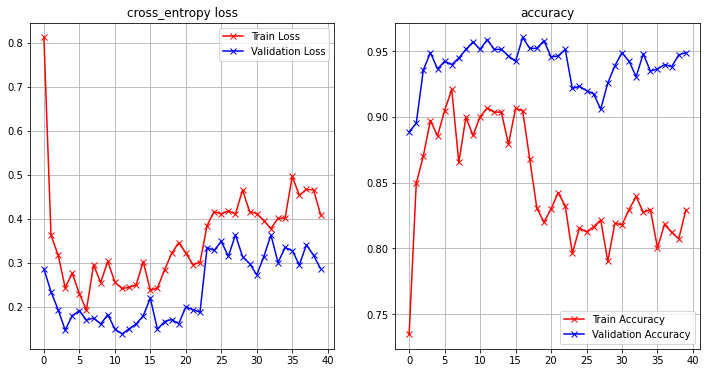

In [229]:
def plot_loss_accuracy_vgg16(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

print('Test loss:', hist_vgg16_2.history["val_loss"][-1])
print('Test accuracy:', hist_vgg16_2.history['val_acc'][-1])
print('Train loss:', hist_vgg16_2.history["loss"][-1])
print('Train accuracy:', hist_vgg16_2.history['acc'][-1])
plot_loss_accuracy_vgg16(hist_vgg16_2)

## VGG16 version 3

* fine tuning the last 3 convolutional networks

In [ ]:
t_model_4.trainable = True

set_trainable = False
for layer in t_model_4.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [234]:
model_vgg16_3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['acc'])

hist_vgg16_3 = model_vgg16_3.fit_generator(
      train_generator,
      epochs=15,
      validation_data=test_generator)

Epoch 1/15
89/89 [==============================] - 64s 710ms/step - loss: 0.5990 - acc: 0.7563 - val_loss: 0.4331 - val_acc: 0.8218
Epoch 2/15
80/89 [=========================>....] - ETA: 5s - loss: 0.3304 - acc: 0.8777

KeyboardInterrupt: ignored